In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle
import umap
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logger = logging.getLogger()  # Logger

logger.setLevel("INFO")
#logging.info("Hello")

In [2]:
def write_pickle(path, obj):
    with open(path, "wb") as f:
        pickle.dump(obj, f)
        
def read_pickle(path):
    with open(path, "rb") as f:
        obj = pickle.load(f)
    return obj

In [3]:
#df_inception = read_pickle(path="/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/SVM/df_combined_incept.pkl")
df_inception = read_pickle(path="/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/SVM/df_combined_incept_6.pkl")

In [4]:
features = df_inception["Features"].to_list()

In [5]:
# cluster
k = 6
clusters = KMeans(k, random_state = 42)
clusters_incept = clusters.fit(features)

In [6]:
df_inception["clusterid"] = clusters.labels_
df_inception["Patient"] = [x.split("_")[0] for x in df_inception["Img"]]
df_inception

,Img,lbl,Features,clusterid,Patient
0,18QH2FGR4_270,non-cancer,"[0.17763883, 0.14930727, 0.099433355, 0.046645...",2,18QH2FGR4
1,18QH2FGR4_324,non-cancer,"[0.2863244, 0.029040584, 0.13237323, 0.0353634...",4,18QH2FGR4
2,18QH2FGR4_322,non-cancer,"[0.25656575, 0.19232213, 0.34882596, 0.2506054...",4,18QH2FGR4
3,18QH2FGR4_397,non-cancer,"[0.07404756, 0.05178327, 0.018168312, 0.131144...",1,18QH2FGR4
4,18QH2FGR4_436,non-cancer,"[0.10449956, 0.085279934, 0.0015779797, 0.0874...",1,18QH2FGR4
...,...,...,...,...,...
2777,ILH0VMVF5_363,non-cancer,"[0.12134281, 0.27698424, 0.23658052, 0.1250962...",3,ILH0VMVF5
2778,ILH0VMVF5_659,Basal,"[0.46201754, 0.12849265, 0.14100572, 0.0390820...",2,ILH0VMVF5
2779,ILH0VMVF5_611,non-cancer,"[0.42040995, 0.08295217, 0.18102339, 0.0045807...",4,ILH0VMVF5
2780,ILH0VMVF5_618,non-cancer,"[0.085018404, 0.026833305, 0.0001320681, 0.148...",1,ILH0VMVF5


In [7]:
# UMAP projection of feature vectors
reducer = umap.UMAP()
df = pd.DataFrame(features)
embedding = reducer.fit_transform(df)
embedding.shape

(2782, 2)

In [15]:
df_inception["UMAP1"] =  [embedding[i, 0] for i in range(df_inception.shape[0])]
df_inception["UMAP2"] =  [embedding[i, 1] for i in range(df_inception.shape[0])]

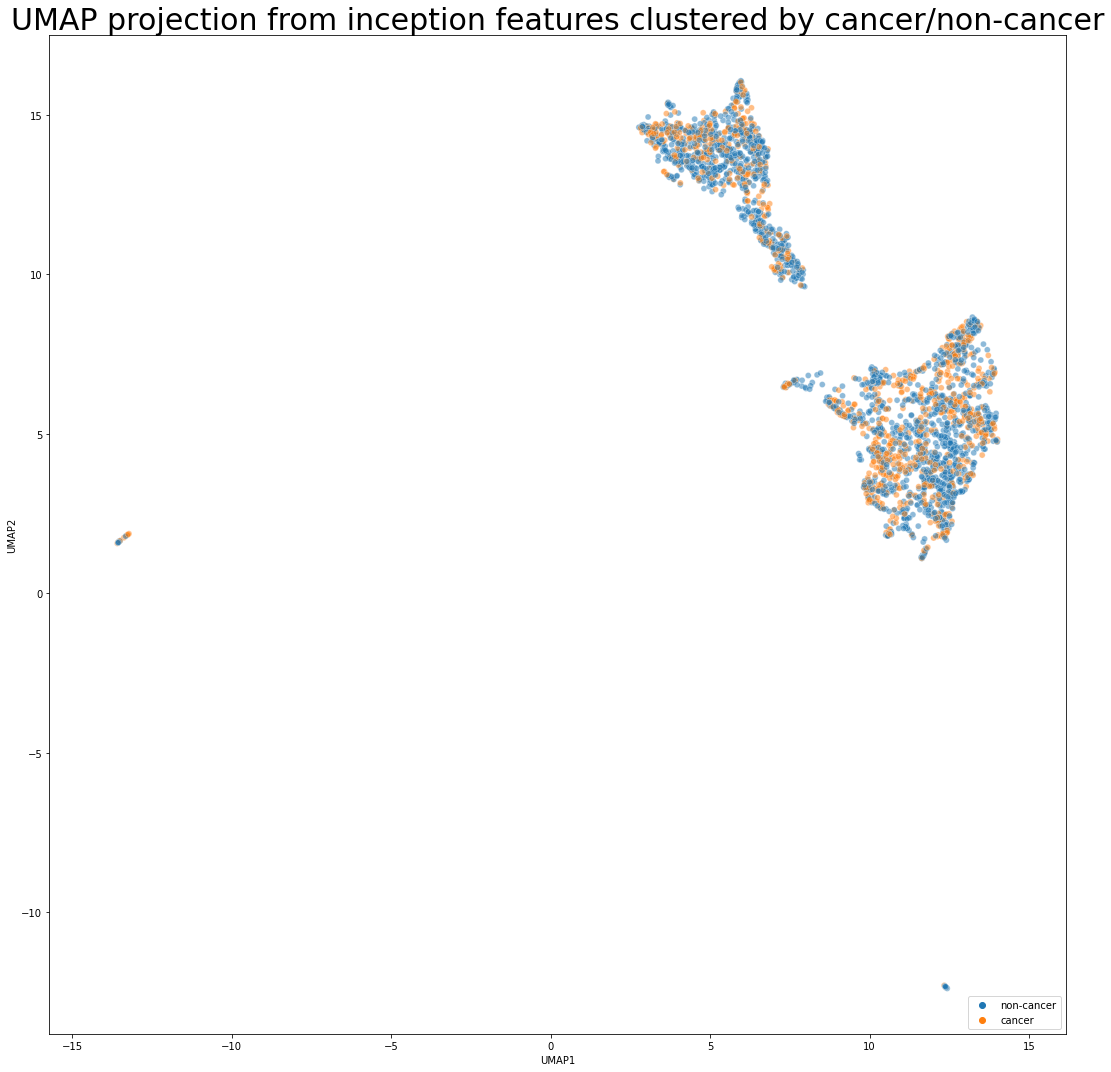

<Figure size 432x288 with 0 Axes>

In [16]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_inception, x="UMAP1", y="UMAP2", hue="lbl", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from inception features clustered by cancer/non-cancer', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_inception_feaftures_two_classes.png')

In [8]:
df_inception["UMAP3"] =  [embedding[i, 0] for i in range(df_inception.shape[0])]
df_inception["UMAP4"] =  [embedding[i, 1] for i in range(df_inception.shape[0])]

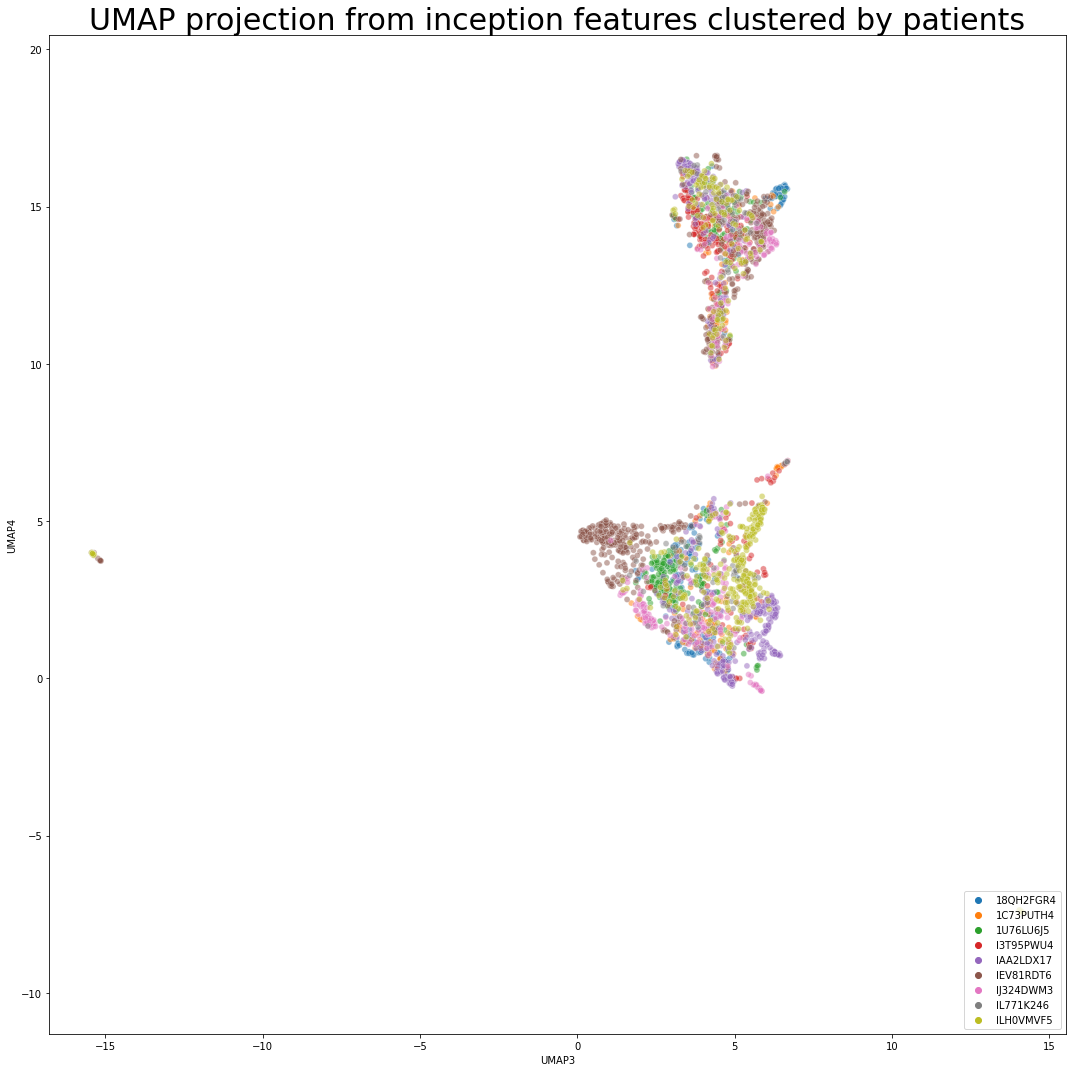

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_inception, x="UMAP3", y="UMAP4", hue="Patient", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from inception features clustered by patients', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_inception_feaftures_patients.png')

In [8]:
df_inception["UMAP5"] =  [embedding[i, 0] for i in range(df_inception.shape[0])]
df_inception["UMAP6"] =  [embedding[i, 1] for i in range(df_inception.shape[0])]

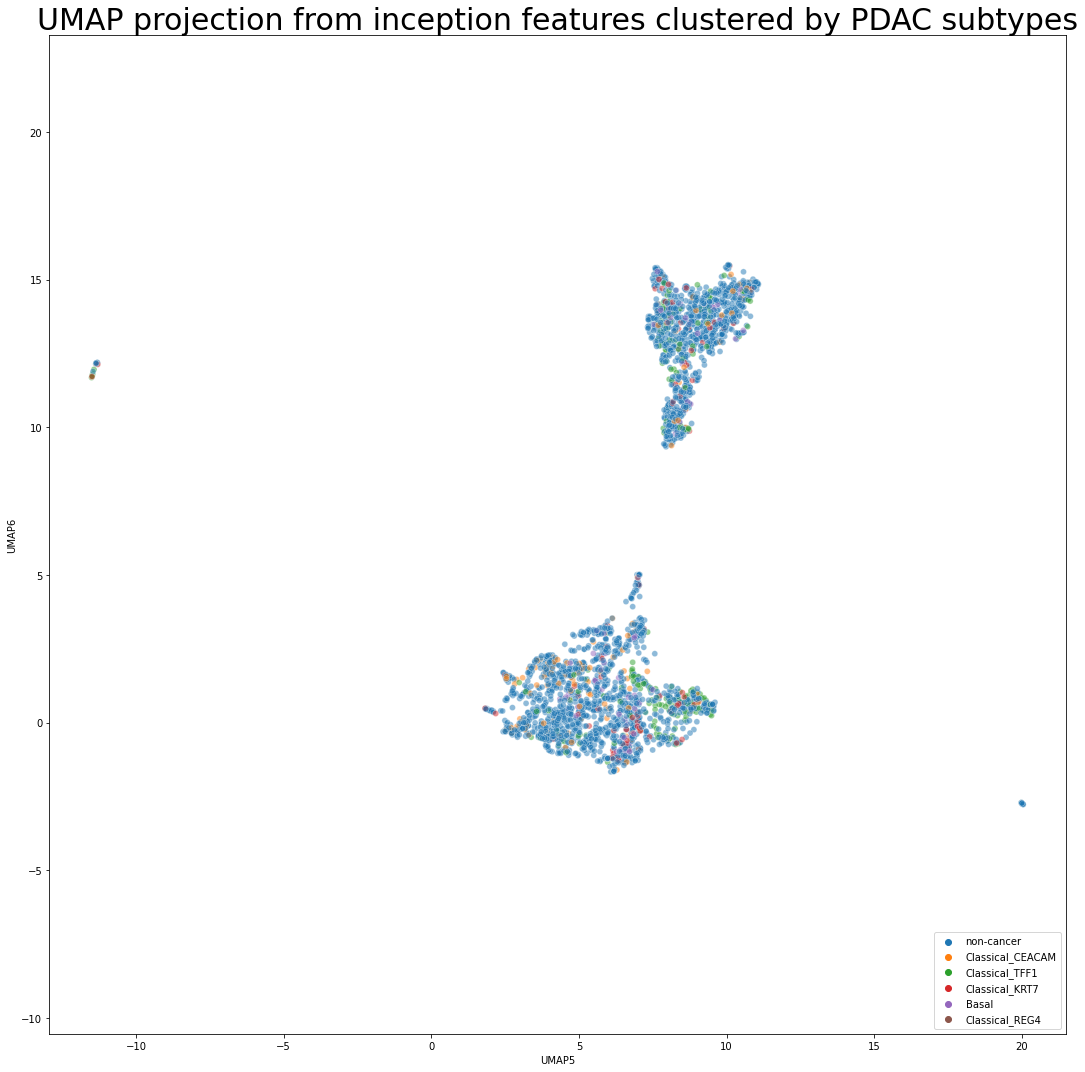

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_inception, x="UMAP5", y="UMAP6", hue="lbl", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from inception features clustered by PDAC subtypes', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_inception_feaftures_6class.png')